In [21]:
import os, warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import tensorflow as tf

def set_seed(seed = 31415):
  np.random.seed(seed)
  tf.random.set_seed(seed)
  os.environ["PYTHONHASHSEED"] = str(seed)
  os.environ["TF_DETERMINISTIC_OPS"] = "1"
set_seed()

In [2]:
from keras.datasets import cifar10
from keras.utils import np_utils

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for x in [x_train, x_test]:
  x = x/255

y_train_cod = np_utils.to_categorical(y_train)
y_test_cod = np_utils.to_categorical(y_test)

170508288/170498071 [==============================] - 2s 0us/step


In [27]:
def vizu(img,r):
  r_cat = pd.Series(r.flatten()).map(({0:"airplane",1:"automobile",2:"bird",3:"cat",
                                                4:"deer",5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}))
  fig = plt.figure(figsize=(14,6))
  fig.patch.set_facecolor("white")

  for i in range (21):
    plt.subplot(3,7,1+i)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i])
    plt.xlabel(r_cat[i])
  plt.show()

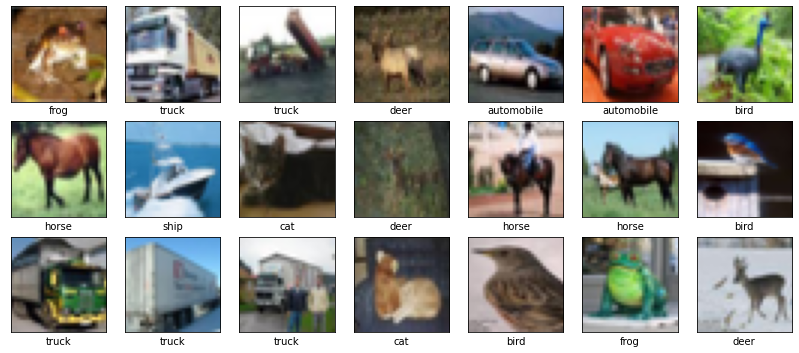

In [4]:
vizu(x_train,y_train)

In [5]:
from keras.layers import Flatten, Activation, Conv2D, MaxPool2D, Dense, Dropout, BatchNormalization, Input, MaxPooling2D, Flatten, Activation, Conv2D
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

def block(input_layer, filter, kernel_size, activation='relu', padding='same', drop_out=True, normalization=True, drop_out_radio=0.3):
  cam_cov = Conv2D(filter, kernel_size, padding = padding, activation=activation)(input_layer)
  max_pooling = MaxPooling2D((2,2),padding=padding)(cam_cov)
  if drop_out:
    cam_cov = Dropout(drop_out_radio)(max_pooling)
  if normalization:
    cam_cov = BatchNormalization()(cam_cov)
  return cam_cov

  

In [6]:
def ImgViz(input_layer, neuron, dense_act='relu', out_act='softmax', num=10):
  chat = Flatten()(input_layer)
  clas = Dense(neuron, activation=dense_act)(chat)
  out = Dense(num, activation=out_act)(clas)
  return out

In [7]:
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Model

img = Input(shape=(32,32,3))

bloco1 = block(img, 32, 3)
bloco2 = block(bloco1, 64, 3)
bloco3 = block(bloco2, 128, 3)

out_n = ImgViz(bloco3, 128)

In [8]:
modelo = Model(inputs=img, outputs=out_n)
early = EarlyStopping(patience=10,restore_best_weights=True)
modelo.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

modelo.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 16, 16, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496 

In [51]:
img2 = Input(shape=(32,32,3))

bloco12 = block(img2, 32, 3)
bloco22 = block(bloco12, 64, 3)
bloco32 = block(bloco22, 128, 3)

out_n2 = ImgViz(bloco32, 128)

modelo2 = Model(inputs=img2, outputs=out_n2)
early2 = EarlyStopping(patience=10,restore_best_weights=True)
modelo2.compile(optimizer = Adam(),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

modelo2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 batch_normalization_3 (Batc  (None, 16, 16, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        1849

In [53]:
no_aug = modelo.fit(x_train, y_train_cod, batch_size=128, epochs=50, callbacks=early, validation_data=(x_test, y_test_cod))

Epoch 1/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0667 - accuracy: 0.8792 - val_loss: 0.1208 - val_accuracy: 0.7858
Epoch 2/50
391/391 [==============================] - 6s 16ms/step - loss: 0.0659 - accuracy: 0.8814 - val_loss: 0.1045 - val_accuracy: 0.8063
Epoch 3/50
391/391 [==============================] - 6s 16ms/step - loss: 0.0658 - accuracy: 0.8819 - val_loss: 0.1175 - val_accuracy: 0.7953
Epoch 4/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0657 - accuracy: 0.8823 - val_loss: 0.1177 - val_accuracy: 0.7901
Epoch 5/50
391/391 [==============================] - 6s 16ms/step - loss: 0.0638 - accuracy: 0.8856 - val_loss: 0.1069 - val_accuracy: 0.8077
Epoch 6/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0634 - accuracy: 0.8873 - val_loss: 0.1111 - val_accuracy: 0.8010
Epoch 7/50
391/391 [==============================] - 7s 17ms/step - loss: 0.0636 - accuracy: 0.8853 - val_loss: 0.1182 - val_accuracy: 0.7924

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

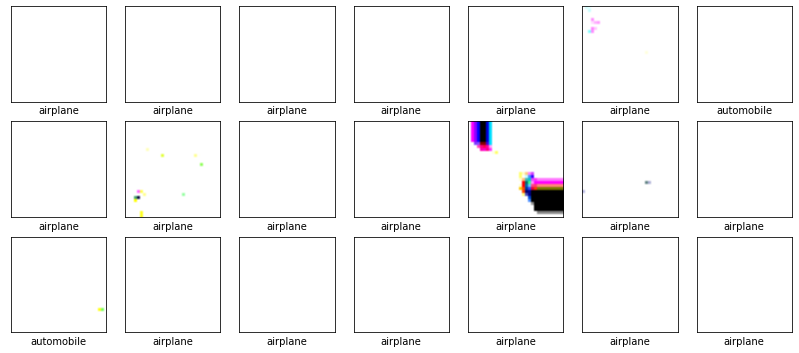

In [54]:
img_gen = ImageDataGenerator(horizontal_flip=True, width_shift_range=0.3, height_shift_range=0.3)

img_gen.fit(x_train)

augi = img_gen.flow(x_train,y_train_cod, batch_size=128)

x_aug, y_aug = next(augi)

vizu(x_aug,y_aug)

In [62]:
aug_model = modelo2.fit(augi, steps_per_epoch=x_train.shape[0]//128, epochs=50, callbacks=early, validation_data=(x_test, y_test_cod))


Epoch 1/50
390/390 [==============================] - 35s 89ms/step - loss: 0.2225 - accuracy: 0.4889 - val_loss: 0.2270 - val_accuracy: 0.5023
Epoch 2/50
390/390 [==============================] - 36s 92ms/step - loss: 0.2101 - accuracy: 0.5220 - val_loss: 0.2375 - val_accuracy: 0.4886
Epoch 3/50
390/390 [==============================] - 35s 90ms/step - loss: 0.2009 - accuracy: 0.5490 - val_loss: 0.1889 - val_accuracy: 0.5954
Epoch 4/50
390/390 [==============================] - 35s 90ms/step - loss: 0.1931 - accuracy: 0.5682 - val_loss: 0.1665 - val_accuracy: 0.6324
Epoch 5/50
390/390 [==============================] - 35s 89ms/step - loss: 0.1868 - accuracy: 0.5883 - val_loss: 0.1684 - val_accuracy: 0.6353
Epoch 6/50
390/390 [==============================] - 35s 89ms/step - loss: 0.1828 - accuracy: 0.5978 - val_loss: 0.1881 - val_accuracy: 0.6030
Epoch 7/50
390/390 [==============================] - 36s 92ms/step - loss: 0.1776 - accuracy: 0.6109 - val_loss: 0.1760 - val_accuracy:

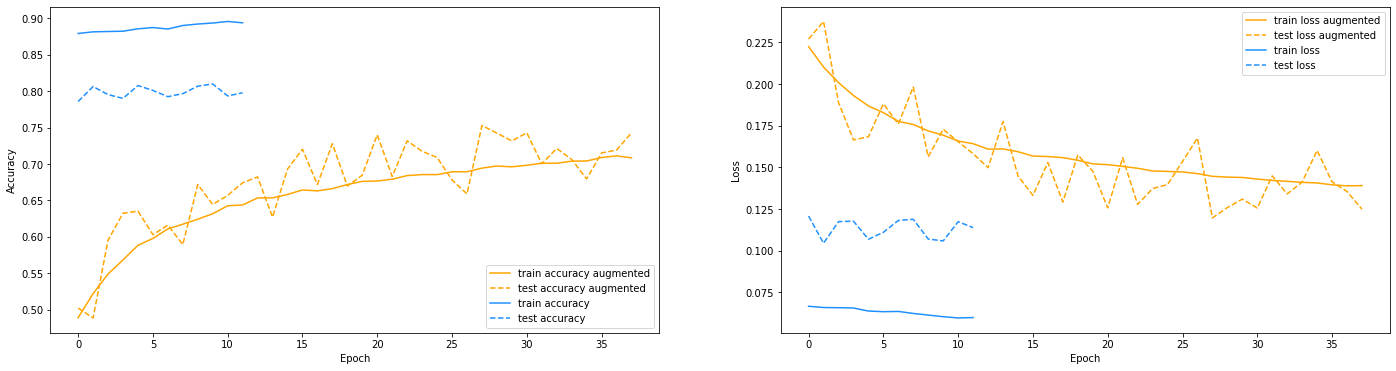

In [65]:
fig, ax = plt.subplots(1, 2,  figsize = (24,6));

ax[0].plot(aug_model.history['accuracy'],
         label='train accuracy augmented',
         c='orange', ls='-')
ax[0].plot(aug_model.history['val_accuracy'],
         label='test accuracy augmented',
         c='orange',ls='--')
ax[0].plot(no_aug.history['accuracy'],
         label='train accuracy',
         c='dodgerblue', ls='-')
ax[0].plot(no_aug.history['val_accuracy'],
         label='test accuracy',
         c='dodgerblue', ls='--')

ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='lower right')

# Valores de perda
ax[1].plot(aug_model.history['loss'],
         label='train loss augmented',
         c='orange', ls='-')
ax[1].plot(aug_model.history['val_loss'],
         label='test loss augmented',
         c='orange',ls='--')
ax[1].plot(no_aug.history['loss'],
         label='train loss',
         c='dodgerblue', ls='-')
ax[1].plot(no_aug.history['val_loss'],
         label='test loss',
         c='dodgerblue',ls='--')

ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='upper right')

In [67]:
result_no_aug = modelo.evaluate(x_test, y_test_cod)
print(result_no_aug)

result_aug = modelo2.evaluate(x_test, y_test_cod)
print(result_aug)

313/313 [==============================] - 2s 5ms/step - loss: 0.1045 - accuracy: 0.8063
[0.10451201349496841, 0.8062999844551086]
313/313 [==============================] - 2s 5ms/step - loss: 0.1197 - accuracy: 0.7529
[0.11970417201519012, 0.7529000043869019]
